#### STAT 504, HW #2

### 1. Read yelp.csv into a DataFrame.

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT7/master/data/yelp.csv'
yelp = pd.read_csv(url)
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


### 2. Create a new DataFrame that only contains the 5-star and 1-star reviews.

In [2]:
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

### 3. Use a random seed 1234567, split the new DataFrame into training and testing sets, using the review text as the feature and the star rating as the response variable. 

In [3]:
X = yelp_best_worst.text
y = yelp_best_worst.stars
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234567)

### 4.	Use CountVectorizer to create document-term matrices from X_train and X_test.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)

### 5. Use Logistic Regression, k-Nearest Neighbors (k=11), Classification Tree to predict the star rating for reviews in the testing set, and calculate the AUC and plot the ROC Curve for the three models.

AUC for Logistic Regression: 	0.956508854543
AUC for KNN (K=11): 		0.735536059712
AUC for Classification Tree: 	0.711932628617


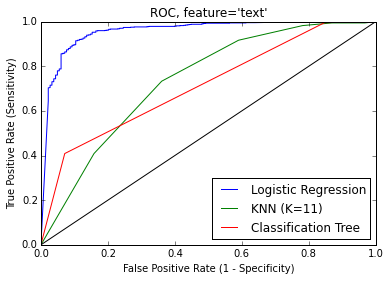

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Define a function to calculate AUC and plot ROC
# Argument(weather use CountVectorizer, (1=Yes, 0=No), model type)
def rocauc(countVectorizer,method):
    if countVectorizer == 1:
        Xtrain = train_dtm; Xtest = test_dtm; tit = 'ROC, feature=\'text\''
    elif countVectorizer == 0:
        Xtrain = X_train; Xtest = X_test; tit = 'ROC, features=\'cool/useful/funny\''
    if method == "reg":        
        model = LogisticRegression(C=1e9)
        tag = 'Logistic Regression'; col = 'b'
    elif method == "knn":        
        model = KNeighborsClassifier(n_neighbors=11)
        tag = 'KNN (K=11)'; col = 'g'
    elif method == "tree":
        model = DecisionTreeClassifier(max_depth=3, random_state=1)
        tag = 'Classification Tree'; col = 'r'
    # AUC values
    model.fit(Xtrain, y_train)
    y_pred_class = model.predict(Xtest)
    y_pred_prob = model.predict_proba(Xtest)[:, 1]
    y_test_binary = np.where(y_test==5, 1, 0)
    # ROC plot
    fpr, tpr, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
    plt.plot(fpr, tpr, label=tag, color=col)
    plt.legend(loc='lower right')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title(tit)
    return metrics.roc_auc_score(y_test_binary, y_pred_prob)

print "AUC for Logistic Regression: \t", rocauc(1,"reg")
print "AUC for KNN (K=11): \t\t", rocauc(1,"knn")
print "AUC for Classification Tree: \t", rocauc(1,"tree")
plt.plot([0,1,1], 'black')

### 6.	Add vote types (cool/useful/funny) as an additional features into the modeling process and refit the three models to predict the star rating in the testing set, and calculate the AUC and plot the ROC Curve for the three models. 

AUC for Logistic Regression: 	0.674433524167
AUC for KNN (K=11): 		0.651455349525
AUC for Classification Tree: 	0.626992190807


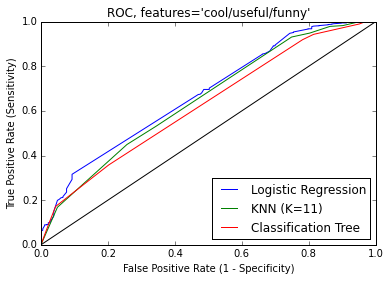

In [6]:
feature_cols = ['cool', 'useful', 'funny']
X = yelp_best_worst[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234567)

print "AUC for Logistic Regression: \t", rocauc(0,"reg")
print "AUC for KNN (K=11): \t\t", rocauc(0,"knn")
print "AUC for Classification Tree: \t", rocauc(0,"tree")
plt.plot([0,1,1], 'black')

### Conclusions:
1. After adding new features, the models become less accurate.
2. No matter using "text" or "cool/useful/funny" as features to predict, the logistic regression model is the most accurate, followed by KNN method and classification tree method.
3. Logistic regression with "text" as feature performs the best, which AUC area is above .95.